# Diabetes Prediction using Random Forest Classifier Algorithm

### Author: Subhajit Saha

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

%matplotlib inline

In [3]:
# Loading the dataset
df = pd.read_csv('kaggle_diabetes.csv')

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [7]:
df.shape

(2000, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# check if any null value is present
df.isnull().values.any()

False

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [12]:
# sns.pairplot(df)

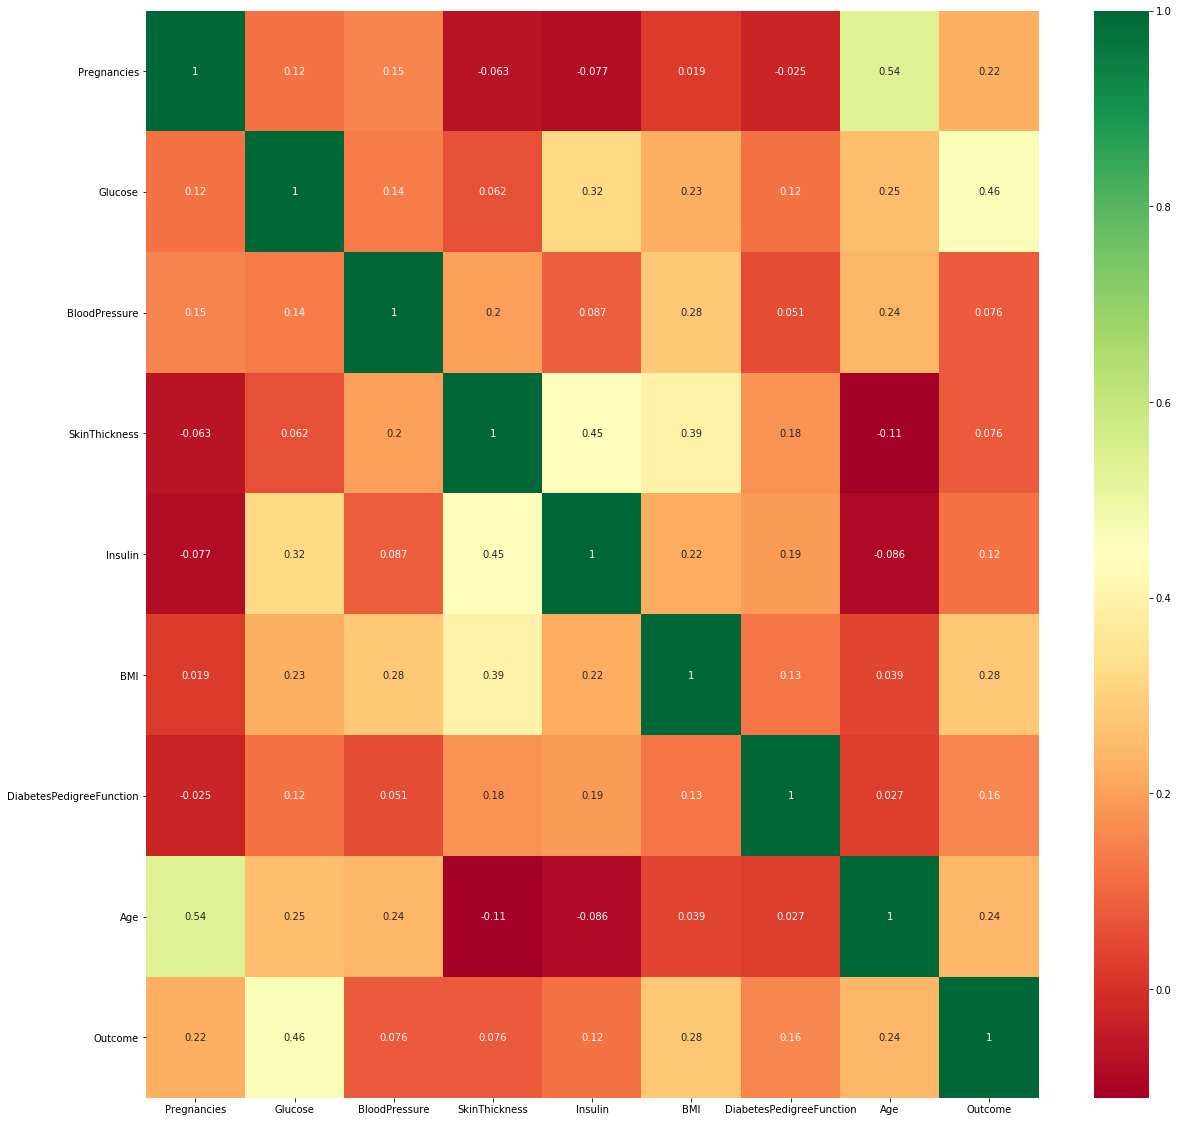

In [13]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
# checking whether imbalance dataset or not
diabetes_true_count = len(df.loc[df['Outcome'] == 1])
diabetes_false_count = len(df.loc[df['Outcome'] == 0])
(diabetes_true_count, diabetes_false_count)

(684, 1316)

In [15]:
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

In [16]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness',
                                                                                'Insulin','BMI']].replace(0,np.NaN)

In [17]:
# df_copy

In [18]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [19]:
# df_copy

In [20]:
# # Model Building
# from sklearn.model_selection import train_test_split
# X = df.drop(columns='Outcome', axis =1)
# y = df['Outcome']

In [21]:
# By Subhajit Saha
# Model Building
from sklearn.model_selection import train_test_split
X = df_copy.drop(columns='Outcome', axis =1)
y = df_copy['Outcome']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [24]:
predictions = classifier.predict(X_test)

In [25]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predictions)))

Accuracy = 0.973


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       253
           1       0.99      0.94      0.96       147

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [29]:
print(confusion_matrix(y_test,predictions))

[[251   2]
 [  9 138]]


In [30]:
cm = confusion_matrix(y_test, predictions)
score = accuracy_score(y_test, predictions)

print('Confusion Matrix is:\n ',cm)
print('Accuracy score is:\n ',score)

Confusion Matrix is:
  [[251   2]
 [  9 138]]
Accuracy score is:
  0.9725


In [31]:
# # Creating a pickle file for the classifier
# filename = 'diabetes-prediction-rfc-model.pkl'
# pickle.dump(classifier, open(filename, 'wb'))